# A First Look at Vector Products

```{contents}
:local:
```

In [1]:
%config InlineBackend.figure_format = 'svg'

from __future__ import annotations

import math
from IPython.display import display
from typing import Sequence, TypeVar, Optional
import matplotlib.pyplot as plt
import numpy as np
import rich

import sys
from pathlib import Path

def find_root_dir(current_path: Path | None = None, marker: str = '.git') -> Path | None:
    """
    Find the root directory by searching for a directory or file that serves as a
    marker.

    Parameters
    ----------
    current_path : Path | None
        The starting path to search from. If None, the current working directory
        `Path.cwd()` is used.
    marker : str
        The name of the file or directory that signifies the root.

    Returns
    -------
    Path | None
        The path to the root directory. Returns None if the marker is not found.
    """
    if not current_path:
        current_path = Path.cwd()
    current_path = current_path.resolve()
    for parent in [current_path, *current_path.parents]:
        if (parent / marker).exists():
            return parent
    return None

root_dir = find_root_dir(marker='omnivault')

if root_dir is not None:
    sys.path.append(str(root_dir))
    from omnivault.utils.visualization.style import use_svg_display
    from omnivault.linear_algebra.plotter import (
        VectorPlotter2D,
        VectorPlotter3D,
        add_vectors_to_plotter,
        add_text_annotations,
    )
    from omnivault.linear_algebra.vector import Vector2D, Vector3D
else:
    raise ImportError("Root directory not found.")

use_svg_display()

## Dot Product

In this introductory section, we'll take our first look at the concept of the
dot product, a fundamental operation in linear algebra with far-reaching
implications in various fields, particularly in machine learning and analytical
geometry. We'll revisit and explore this concept more rigorously later in the
series, especially after we've established a solid understanding of vector
spaces.

The dot product, also known as the scalar product, is a way to multiply two
vectors that results in a scalar (a single number). This operation is key to
understanding many aspects of vectors and their interactions, especially in the
context of machine learning, where it's used in tasks ranging from projections
and similarity measurements to more complex operations in algorithms and data
transformations.

In machine/deep learning applications, such as
**[neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network)**
and
**[support vector machines](https://en.wikipedia.org/wiki/Support-vector_machine)**,
the dot product serves as a building block for understanding how data points
relate to each other in feature (embedding) space. It's also a stepping stone
towards more advanced concepts in analytical geometry, where the dot product
plays a crucial role in defining angles and distances between vectors.

### Definition

Given that [Wikipedia](https://en.wikipedia.org/wiki/Dot_product)[^dot_product]
offers a comprehensive introduction to the dot product, we will incorporate some
of its definitions into our discussion.

#### Algebraic Definition

The dot product of two vectors
$\color{red}{\mathbf{a} =  \begin{bmatrix} a_1  \; a_2  \; \dots \; a_D \end{bmatrix}^{\rm T}}$
and
$\color{blue}{\mathbf{b} =  \begin{bmatrix} b_1 & b_2  & \dots & b_D \end{bmatrix}^{\rm T}}$
is defined as:

$$\mathbf{\color{red}\mathbf{a}}\cdot\mathbf{\color{blue}\mathbf{b}}=\sum_{d=1}^D {\color{red}a}_d{\color{blue}b}_d={\color{red}a}_1{\color{blue}b}_1+{\color{red}a}_2{\color{blue}b}_2+\cdots+{\color{red}a}_D{\color{blue}b}_D$$

where $\sum$ denotes summation and $D$ is the dimension of the vector space.
Since **vector spaces** have not been introduced, we just think of it as the
$\mathbb{R}^D$ dimensional space.

```{prf:example} Dot Product Example in 3-Dimensional Space
:label: linear-algebra-02-vectors-04-vector-products-dot-product-example-1

For instance, in 3-dimensional space, the **dot product** of column vectors
$\begin{bmatrix}1 & 3 & -5\end{bmatrix}^{\rm T}$ and
$\begin{bmatrix}4 & -2 & -2\end{bmatrix}^{\rm T}$

$$
\begin{align}
\ [{\color{red}1, 3, -5}] \cdot  [{\color{blue}4, -2, -1}] &= ({\color{red}1} \times {\color{blue}4}) + ({\color{red}3}\times{\color{blue}-2}) + ({\color{red}-5}\times{\color{blue}-1}) \\
&= 4 - 6 + 5 \\
&= 3
\end{align}
$$
```

#### Interpreting Dot Product as Matrix Multiplication

We are a little ahead in terms of the definition of Matrices, but for people
familiar with it, or have worked with `numpy` before, we know that we can
interpret a row vector of dimension $D$ as a matrix of dimension $1 \times D$.
Similarly, we can interpret a column vector of dimension $D$ as a matrix of
dimension $D \times 1$. With this interpretation, we can perform a so called
"matrix multiplication" of the row vector and column vector. The result is the
dot product.

If vectors are treated like row matrices, the dot product can also be written as
a matrix multiplication.

$$\mathbf{\color{red}a} \cdot \mathbf{\color{blue}b} = \mathbf{\color{red}a}^\mathsf T \mathbf{\color{blue}b}$$

Expressing the above example in this way, a $1 \times 3$ matrix **row vector**
is multiplied by a $3 \times 1$ matrix **column vector** to get a $1 \times 1$
matrix that is identified with its unique entry:

$$
    \begin{bmatrix}
    \color{red}1 & \color{red}3 & \color{red}-5
    \end{bmatrix}
    \begin{bmatrix}
    \color{blue}4 \\ \color{blue}-2 \\ \color{blue}-1
    \end{bmatrix} = 3
$$

#### Geometric definition

In [Euclidean space](https://en.wikipedia.org/wiki/Euclidean_space), a vector
resides in it is a geometric object that possesses both a magnitude and a
direction. A vector can be pictured as an arrow. Its magnitude is its length,
and its direction is the direction to which the arrow points. The magnitude of a
vector **a** is denoted by $\left\| \mathbf{a} \right\|$. The dot product of two
Euclidean vectors **a** and **b** is defined by

$$
\mathbf{a} \cdot \mathbf{b} = \|\mathbf{a}\|\ \|\mathbf{b}\|\cos\theta ,
$$

where $\theta$ is the angle between $\mathbf{a}$ and $\mathbf{b}$.

```{figure} ./assets/04-vector-products-dot-product-projection-math-insight.png
---
name: linear-algebra-02-vectors-04-vector-products-dot-product-projection-math-insight
---
Diagram of Scalar Projection and Dot Product. Image Credit: [Math Insight](https://mathinsight.org/dot_product)
```

##### Proof of Geometric Definition and The Law of Cosines

For readers keen on _proofs_, the geometric definition of the dot product can be
derived from the
[**Law of Cosines**](https://en.wikipedia.org/wiki/Law_of_cosines).

##### Scalar projections

[**Scalar projection**](https://en.wikipedia.org/wiki/Scalar_projection) offer a
concise way to understand the geometric interpretation of the dot product by
illustrating how one vector projects onto another. For the scalar projection of
vector $\mathbf{a}$ onto vector $\mathbf{b}$, we are essentially looking at the
length of the part of $\mathbf{a}$ that aligns with the direction of
$\mathbf{b}$, assuming both vectors originate from the same point. This length,
known as the scalar projection, can be positive, negative, or zero, reflecting
the orientation of $\mathbf{a}$ relative to $\mathbf{b}$.

Mathematically, the scalar projection of $\mathbf{a}$ onto $\mathbf{b}$, denoted
as $\text{proj}_{\mathbf{b}} \mathbf{a}$, is given by:

$$
\text{proj}_{\mathbf{b}} \mathbf{a} = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{b}\|} ,
$$

where $\mathbf{a} \cdot \mathbf{b}$ is the dot product of $\mathbf{a}$ and
$\mathbf{b}$, and $\|\mathbf{b}\|$ is the magnitude of $\mathbf{b}$. This
calculation reveals the component of $\mathbf{a}$ that is in the same direction
as $\mathbf{b}$, providing a quantitative measure of how much $\mathbf{a}$
'extends' in the direction of $\mathbf{b}$.

But how does this scalar projection relate to the dot product and the angle
between the vectors? Here are a few key insights:

1. **Measurement of Alignment**: The scalar projection of vector $\mathbf{a}$
   onto vector $\mathbf{b}$ quantifies the extent to which $\mathbf{a}$ aligns
   along the direction of $\mathbf{b}$. This alignment is crucial for
   understanding the dot product geometrically because the dot product,
   $\mathbf{a} \cdot \mathbf{b} = \|\mathbf{a}\|\|\mathbf{b}\|\cos\theta$,
   essentially measures how much of $\mathbf{a}$ lies in the direction of
   $\mathbf{b}$ when considering the angle $\theta$ between them. Scalar
   projection makes this concept tangible by providing a specific length value
   that represents this alignment.

2. **Cosine of the Angle**: The role of $\cos\theta$ in the dot product formula
   is pivotal because it adjusts the magnitude of the product based on the angle
   between the two vectors. When $\theta$ is small (vectors more aligned),
   $\cos\theta$ is closer to 1, indicating a strong positive projection (i.e.,
   $\mathbf{a}$ largely points in the same direction as $\mathbf{b}$). When
   $\theta$ is 90 degrees, $\cos\theta$ is 0, reflecting orthogonal vectors with
   no projection onto each other. This relationship between $\cos\theta$ and the
   scalar projection encapsulates the geometric interpretation of the dot
   product as a measure of vector alignment and interaction.

3. **Understanding Vector Magnitudes and Direction**: Scalar projections and the
   dot product together provide a comprehensive view of how vectors interact
   based not just on their direction but also on their magnitudes. The dot
   product takes into account both the size (magnitude) of the vectors and their
   directional relationship, offering a single scalar value that encapsulates
   both aspects. Through scalar projection, we see the practical application of
   these principles, where the magnitude of the projection tells us how much one
   vector extends in the direction of another, grounded in the vectors'
   magnitudes and the angle between them.

##### Sign of the Dot Product is Determined by the Angle in between Two Vectors

The geometric definition can be re-written as follows:

$$
\begin{equation} \label{eq1}
\begin{split}
\mathbf{a}\cdot\mathbf{b} &=\|\mathbf{a}\|\ \|\mathbf{b}\|\cos\theta \implies \cos(\theta) = \frac{\mathbf{a}^\top \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|} \implies \theta = \cos^{-1}\left(\frac{\mathbf{a}^\top \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|}\right)
\end{split}
\end{equation}
$$

which essentially means that one can find the angle between two known vectors in
any dimensional space.

The **sign** of the dot product is determined solely by the angle between the
two vectors. **By definition**,
$\mathbf{a
}\cdot\mathbf{b} = \|\mathbf{a}\|\ \|\mathbf{b}\|\cos\theta$, we know
that the sign (positive or negative) of the dot product
$\mathbf{a} \cdot \mathbf{b}$ is solely determined by $\cos \theta$ since
$\|\mathbf{a}\| \|\mathbf{b}\|$ is always positive.

-   **Case 1 ($0< \theta < 90$): This implies that
    $\cos \theta > 0 \implies \|\mathbf{a}\|\ \|\mathbf{b}\|\cos\theta > 0 \implies \mathbf{a}\cdot\mathbf{b} > 0$.**
-   **Case 2 ($90 < \theta < 180$): This implies that
    $\cos \theta < 0 \implies \|\mathbf{a}\|\ \|\mathbf{b}\|\cos\theta < 0 \implies \mathbf{a}\cdot\mathbf{b} < 0$.**
-   **Case 3 ($\theta = 90$): This is an important property, for now, we just
    need to know that since $\cos \theta = 0$, then
    $\mathbf{a} \cdot \mathbf{b} = \mathbf{0}$. These two vectors are
    orthogonal.**
-   **Case 4 ($\theta = 0$ or $\theta = 180$): This implies that
    $\cos \theta = 1 \implies \|\mathbf{a}\|\ \|\mathbf{b}\|\cos\theta = \|\mathbf{a}\|\ \|\mathbf{b}\|$.
    We say these two vectors are collinear.**

A simple consequence of case 4 is that if a vector $\mathbf{a}$ dot product with
itself, then by case 4, we have
$\mathbf{a} \cdot \mathbf{a} = \|\mathbf{a}\|^2 \implies \|\mathbf{a}\| = \sqrt{\mathbf{a} \cdot \mathbf{a}}$
which is the formula of the
[Euclidean length](https://en.wikipedia.org/wiki/Euclidean_distance) of the
vector.

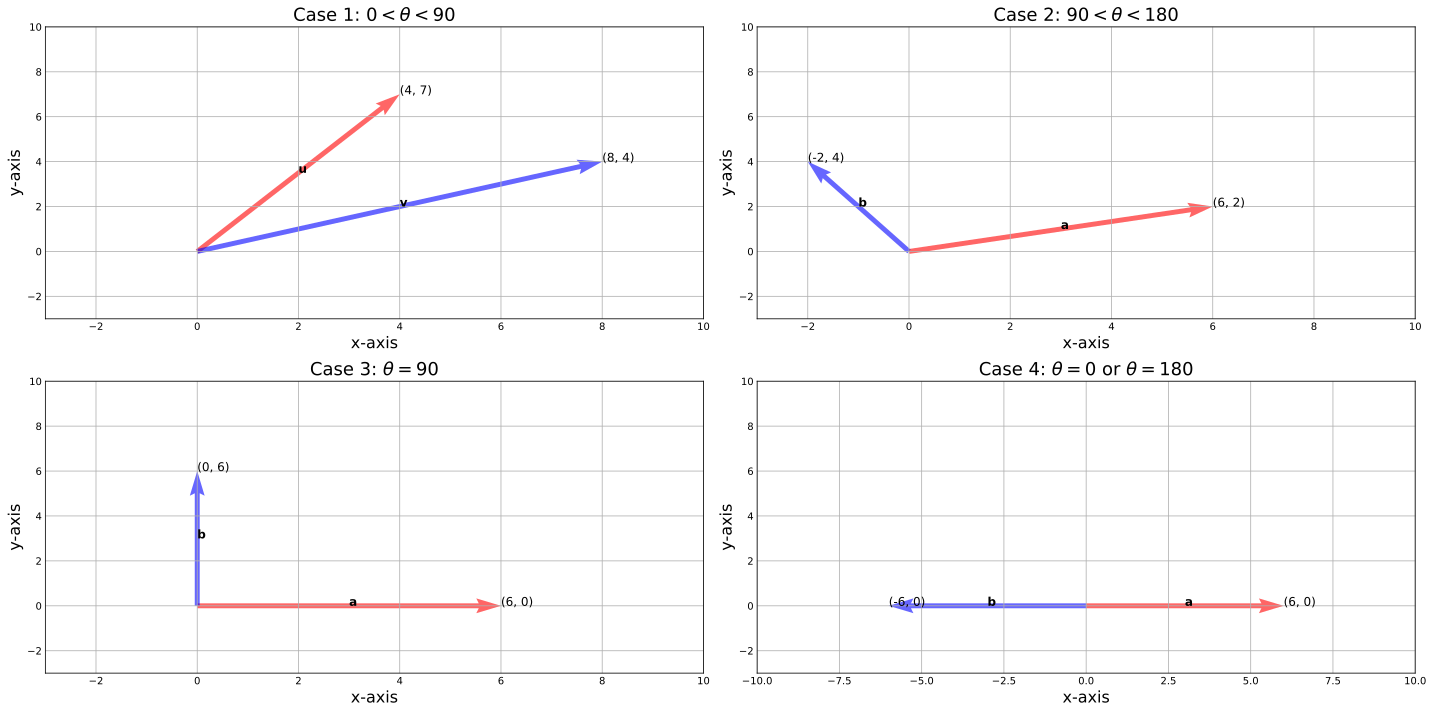

In [2]:
# Create plot with 4 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Define common ax_kwargs for clarity and consistency
common_ax_kwargs = {
    "set_xlabel": {"xlabel": "x-axis", "fontsize": 16},
    "set_ylabel": {"ylabel": "y-axis", "fontsize": 16},
}

# Case 1: Acute angle
plotter_case1 = VectorPlotter2D(
    fig=fig,
    ax=axes[0, 0],
    ax_kwargs={
        **common_ax_kwargs,
        "set_xlim": {"left": -3, "right": 10},
        "set_ylim": {"bottom": -3, "top": 10},
        "set_title": {"label": "Case 1: $0< \\theta < 90$", "size": 18},
    },
)
vectors_case1 = [
    Vector2D(origin=(0, 0), direction=(4, 7), color="r", label="$\mathbf{u}$"),
    Vector2D(origin=(0, 0), direction=(8, 4), color="b", label="$\mathbf{v}$"),
]
add_vectors_to_plotter(plotter_case1, vectors_case1)
add_text_annotations(plotter_case1, vectors_case1)
plotter_case1.plot()

# Case 2: Obtuse angle
plotter_case2 = VectorPlotter2D(
    fig=fig,
    ax=axes[0, 1],
    ax_kwargs={
        **common_ax_kwargs,
        "set_xlim": {"left": -3, "right": 10},
        "set_ylim": {"bottom": -3, "top": 10},
        "set_title": {"label": "Case 2: $90 < \\theta < 180$", "size": 18},
    },
)
vectors_case2 = [
    Vector2D(origin=(0, 0), direction=(6, 2), color="r", label="$\mathbf{a}$"),
    Vector2D(origin=(0, 0), direction=(-2, 4), color="b", label="$\mathbf{b}$"),
]
add_vectors_to_plotter(plotter_case2, vectors_case2)
add_text_annotations(plotter_case2, vectors_case2)
plotter_case2.plot()

# Case 3: Orthogonal vectors
plotter_case3 = VectorPlotter2D(
    fig=fig,
    ax=axes[1, 0],
    ax_kwargs={
        **common_ax_kwargs,
        "set_xlim": {"left": -3, "right": 10},
        "set_ylim": {"bottom": -3, "top": 10},
        "set_title": {"label": "Case 3: $\\theta = 90$", "size": 18},
    },
)
vectors_case3 = [
    Vector2D(origin=(0, 0), direction=(6, 0), color="r", label="$\mathbf{a}$"),
    Vector2D(origin=(0, 0), direction=(0, 6), color="b", label="$\mathbf{b}$"),
]
add_vectors_to_plotter(plotter_case3, vectors_case3)
add_text_annotations(plotter_case3, vectors_case3)
plotter_case3.plot()

# Case 4: Collinear vectors
plotter_case4 = VectorPlotter2D(
    fig=fig,
    ax=axes[1, 1],
    ax_kwargs={
        **common_ax_kwargs,
        "set_xlim": {"left": -10, "right": 10},
        "set_ylim": {"bottom": -3, "top": 10},
        "set_title": {"label": "Case 4: $\\theta = 0$ or $\\theta = 180$", "size": 18},
    },
)
vectors_case4 = [
    Vector2D(origin=(0, 0), direction=(6, 0), color="r", label="$\mathbf{a}$"),
    Vector2D(origin=(0, 0), direction=(-6, 0), color="b", label="$\mathbf{b}$"),
]
add_vectors_to_plotter(plotter_case4, vectors_case4)
add_text_annotations(plotter_case4, vectors_case4)
plotter_case4.plot()

# Display the plot
plt.tight_layout()
plt.show()

### Properties of Dot Product

The **dot product**[^dot_product] fulfills the following properties if
$\mathbf{a}$, $\mathbf{b}$, and $\mathbf{c}$ are real
[vectors](<https://en.wikipedia.org/wiki/Vector_(mathematics_and_physics)>) and
$\lambda$ is a [scalar](<https://en.wikipedia.org/wiki/Scalar_(mathematics)>).

1. **[Commutative](https://en.wikipedia.org/wiki/Commutative_property):**

    $\mathbf{a} \cdot \mathbf{b} = \mathbf{b} \cdot \mathbf{a} ,$ which follows
    from the definition ($\theta$ is the angle between **a** and **b**):
    $\mathbf{a} \cdot \mathbf{b} = \left\| \mathbf{a} \right\| \left\| \mathbf{b} \right\| \cos \theta = \left\| \mathbf{b} \right\| \left\| \mathbf{a} \right\| \cos \theta = \mathbf{b} \cdot \mathbf{a} .$

2. **[Distributive over vector addition](https://en.wikipedia.org/wiki/Distributive_property):**

    $\mathbf{a} \cdot (\mathbf{b} + \mathbf{c}) = \mathbf{a} \cdot \mathbf{b} + \mathbf{a} \cdot \mathbf{c} .$

3. **[Bilinear](https://en.wikipedia.org/wiki/Bilinear_form):**

    $\mathbf{a} \cdot ( \lambda \mathbf{b} + \mathbf{c} ) = \lambda ( \mathbf{a} \cdot \mathbf{b} ) + ( \mathbf{a} \cdot \mathbf{c} ) .$

4. **[Scalar multiplication](https://en.wikipedia.org/wiki/Scalar_multiplication):**

    $( \lambda_1 \mathbf{a} ) \cdot ( \lambda_2 \mathbf{b} ) = \lambda_1 \lambda_2 ( \mathbf{a} \cdot \mathbf{b} ) .$

5. **Not [associative](https://en.wikipedia.org/wiki/Associative_property):**

    This is because the dot product between a scalar value computed from
    $\mathbf{a} \cdot \mathbf{b}$ and a vector $\mathbf{c}$ is not defined,
    which means that the expressions involved in the associative property,
    $(\mathbf{a} \cdot \mathbf{b}) \cdot \mathbf{c}$ and
    $\mathbf{a} \cdot (\mathbf{b} \cdot \mathbf{c})$, are both ill-defined. Note
    however that the previously mentioned scalar multiplication property is
    sometimes called the "associative law for scalar and dot product" or one can
    say that "the dot product is associative with respect to scalar
    multiplication" because
    $\lambda (\mathbf{a} \cdot \mathbf{b}) = (\lambda \mathbf{a}) \cdot \mathbf{b} = \mathbf{a} \cdot (\lambda \mathbf{b})$.

6. **[Orthogonal](https://en.wikipedia.org/wiki/Orthogonality):**

    Two non-zero vectors $\mathbf{a}$ and $\mathbf{b}$ are _orthogonal_ if and
    only if $\mathbf{a} \cdot \mathbf{b} = \mathbf{0}$.

7. **No [cancellation](https://en.wikipedia.org/wiki/Cancellation_property):**

    Unlike multiplication of ordinary numbers, where if $ab=ac$ then _b_ always
    equals _c_ unless _a_ is zero, the dot product does not obey the
    cancellation law.

8. **[Product Rule](https://en.wikipedia.org/wiki/Product_rule):**

    If $\mathbf{a}$ and $\mathbf{b}$ are
    [differentiable functions](https://en.wikipedia.org/wiki/Differentiable_function),
    then the derivative, denoted by a prime ' of $\mathbf{a} \cdot \mathbf{b}$
    is given by the rule
    $(\mathbf{a} \cdot \mathbf{b})' = \mathbf{a}' \cdot \mathbf{b} + \mathbf{a} \cdot \mathbf{b}'$.

### Cauchy-Schwarz Inequality

Let two vectors $\mathbf{v}$ and $\mathbf{w}$ be in a field $\mathbb{F}^D$, then
the inequality

$$|\mathbf{v}^\top \mathbf{w}| \leq \Vert \mathbf{v} \Vert \Vert \mathbf{w} \Vert$$

holds.

This inequality establishes an **upper bound** for the dot product of two
vectors, indicating that the absolute value of their dot product cannot exceed
the multiplication of their individual norms. It's important to note that this
inequality reaches a point of equality only under two conditions: either both
vectors are the zero vector $\mathbf{0}$, or one vector is a scalar multiple of
the other, denoted as $\mathbf{v} = \lambda \mathbf{w}$. This principle
underscores the inherent relationship between the geometric alignment of vectors
and their magnitudes, providing a foundational concept in vector analysis and
linear algebra.

The condition for equality,
$|\mathbf{v}^\top \mathbf{w}| = \|\mathbf{v}\| \|\mathbf{w}\|$, occurs precisely
when $\mathbf{v}$ and $\mathbf{w}$ are linearly dependent, meaning one is a
scalar multiple of the other ($\mathbf{v} = \lambda \mathbf{w}$). This situation
represents vectors pointing in the same or exactly opposite directions, where
their geometric alignment maximizes the dot product relative to their
magnitudes. This specific case illustrates the tight bound provided by the
inequality and its geometric interpretation as the projection of one vector onto
another.

If you wonder why when $\mathbf{v} = \lambda \mathbf{w}$ implies equality
mathematically, it is apparent if you do a substitution as such

$$|\mathbf{v}^\top \mathbf{w}| = |\lambda \mathbf{w}^\top \mathbf{w}| = \lambda |\mathbf{w}^\top \mathbf{w}| = \lambda \|\mathbf{w}\|^2 = \lambda \|\mathbf{w}\| \|\mathbf{w}\| = \|\mathbf{v}\| \|\mathbf{w}\|$$

where we used the fact that $\mathbf{w}^\top \mathbf{w} = \|\mathbf{w}\|^2$ by
definition.

### Proof of Algebraic and Geometric Equivalence of Dot Product

For the sake of completeness, the proof of the equivalence of the algebraic and
geometric definitions of the dot product can be found in
[ProofWiki](https://proofwiki.org/wiki/Equivalence_of_Definitions_of_Dot_Product).

## Outer Product

### Definition

Given two vectors of size $m \times 1$ and $n \times 1$ respectively

$$
\mathbf{u} = \begin{bmatrix} u_1 \\ u_2 \\ \vdots \\ u_m \end{bmatrix},
\quad
\mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix}
$$

their outer product, denoted $\mathbf{u} \otimes \mathbf{v}$ is defined as the
$m \times n$ matrix $\mathbf{A}$ obtained by multiplying each element of
$\mathbf{u}$ by each element of $\mathbf{v}$.

$$
\mathbf{A} := \mathbf{u} \otimes \mathbf{v} =
\begin{bmatrix}
u_1v_1 & u_1v_2 &  \dots & u_1v_n \\
u_2v_1 & u_2v_2 &  \dots & u_2v_n \\
\vdots & \vdots & \ddots & \vdots \\
u_mv_1 & u_mv_2 &  \dots & u_mv_n
\end{bmatrix}
$$

Or in index notation:

$$(\mathbf{u} \otimes \mathbf{v})_{ij} = u_i v_j$$

Denoting the dot product by $\cdot$, if given an $n \times 1$ vector
$\mathbf{w}$ then

$$
(\mathbf{u} \otimes \mathbf{v}) \mathbf{w} = (\mathbf{v} \cdot \mathbf{w}) \mathbf{u}
$$

If given a $1 \times m$ vector $\mathbf{x}$ then

$$
\mathbf{x} (\mathbf{u} \otimes \mathbf{v}) = (\mathbf{x} \cdot \mathbf{u}) \mathbf{v}^{\operatorname{T}}
$$

If $\mathbf{u}$ and $\mathbf{v}$ are vectors of the same dimension, then
$\det (\mathbf{u} \otimes\mathbf{v}) = 0$.

The outer product $\mathbf{u} \otimes \mathbf{v}$ is equivalent to a matrix
multiplication $\mathbf{u} \mathbf{v}^{\operatorname{T}}$ provided that
$\mathbf{u}$ is represented as a $m \times 1$ column vector and $\mathbf{v}$ as
a $n \times 1$ column vector (which makes $\mathbf{v}^{\operatorname{T}}$ a row
vector). For instance, if $m = 4$ and $n = 3,$ then

$$
  \mathbf{u} \otimes \mathbf{v} = \mathbf{u}\mathbf{v}^\textsf{T} =
  \begin{bmatrix}u_1 \\ u_2 \\ u_3 \\ u_4\end{bmatrix}
    \begin{bmatrix}v_1 & v_2 & v_3\end{bmatrix} =
  \begin{bmatrix}
    u_1 v_1 & u_1 v_2 & u_1 v_3 \\
    u_2 v_1 & u_2 v_2 & u_2 v_3 \\
    u_3 v_1 & u_3 v_2 & u_3 v_3 \\
    u_4 v_1 & u_4 v_2 & u_4 v_3
  \end{bmatrix}.
$$

### Column Wise Interpretation

Especially from the matrix example in the previous section, one can see that the
following holds:

$$
  \mathbf{u} \otimes \mathbf{v} = \mathbf{u}\mathbf{v}^\textsf{T} =
  \begin{bmatrix}u_1 \\ u_2 \\ u_3 \\ u_4\end{bmatrix}
    \begin{bmatrix}v_1 & v_2 & v_3\end{bmatrix} =
  \begin{bmatrix}
    u_1 v_1 & u_1 v_2 & u_1 v_3 \\
    u_2 v_1 & u_2 v_2 & u_2 v_3 \\
    u_3 v_1 & u_3 v_2 & u_3 v_3 \\
    u_4 v_1 & u_4 v_2 & u_4 v_3
  \end{bmatrix}
  =
  \begin{bmatrix}
    v_1 \mathbf{u} & v_2 \mathbf{u} & v_3 \mathbf{u}
  \end{bmatrix}
$$

What this means is that in our example our column vector is $\mathbf{u}$. Then
when we do an outer product of $\mathbf{u}$ on $\mathbf{v}$, then notice each of
the resultant matrix's columns is a scaled version of the column vector
$\mathbf{u}$, scaled none other by the elements of the row vector $\mathbf{v}$
itself.

### Row Wise Interpretation

Especially from the matrix example in the previous section, one can see that the
following holds:

$$
  \mathbf{u} \otimes \mathbf{v} = \mathbf{u}\mathbf{v}^\textsf{T} =
  \begin{bmatrix}u_1 \\ u_2 \\ u_3 \\ u_4\end{bmatrix}
    \begin{bmatrix}v_1 & v_2 & v_3\end{bmatrix} =
  \begin{bmatrix}
    u_1 v_1 & u_1 v_2 & u_1 v_3 \\
    u_2 v_1 & u_2 v_2 & u_2 v_3 \\
    u_3 v_1 & u_3 v_2 & u_3 v_3 \\
    u_4 v_1 & u_4 v_2 & u_4 v_3
  \end{bmatrix}
  =
  \begin{bmatrix}
    u_1 \mathbf{v} \\ u_2 \mathbf{v} \\ u_3 \mathbf{v}
  \end{bmatrix}
$$

What this means is that in our example our row vector is $\mathbf{v}$. Then when
we do an outer product of $\mathbf{u}$ on $\mathbf{v}$, then notice each of the
resultant matrix's rows is a scaled version of the row vector $\mathbf{v}$,
scaled none other by the elements of the row vector $\mathbf{u}$ itself.

### Transpose Property

$\mathbf{u}\mathbf{v}^\top$ and $\mathbf{v}\mathbf{u}^\top$. What can you deduce
from this? Actually if you do an example, you will notice that the resulting
matrices are the same with rows and columns swapped. That is,

$$(\mathbf{u}\mathbf{v}^\top)^\top = \mathbf{v}\mathbf{u}^\top$$

## References and Further Readings

-   [Dot Product - Wikipedia](https://en.wikipedia.org/wiki/Dot_product)
-   [Scalar Projection - Wikipedia](https://en.wikipedia.org/wiki/Scalar_projection)
-   [Scalar and Vector Projections - CK-12 College Precalculus](https://flexbooks.ck12.org/cbook/ck-12-college-precalculus/section/9.6/primary/lesson/scalar-and-vector-projections-c-precalc/)
-   [Geometrical meanings of a dot product and cross product of a vector - Quora](https://www.quora.com/What-are-the-geometrical-meanings-of-a-dot-product-and-cross-product-of-a-vector)
-   [What does the dot product of two vectors represent - Math Stack Exchange](https://math.stackexchange.com/questions/805954/what-does-the-dot-product-of-two-vectors-represent)

[^dot_product]:
    [Dot Product - Wikipedia](https://en.wikipedia.org/wiki/Dot_product)